In [96]:
import doctest
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# SHARK STUFF

In [99]:
shark_df = pd.read_csv("sea_otters_table.csv")
#df_regions = df.groupby("Region").sum()
#df_regions
#df[df["Region"]=="ALL"]
shark_df_filtered = shark_df.loc[slice(28), :]

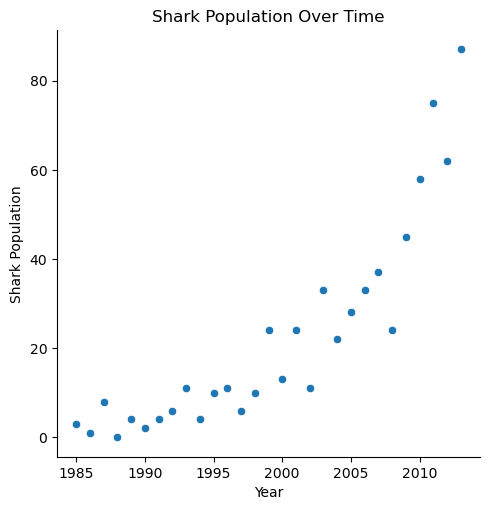

In [100]:
plot = sns.relplot(shark_df_filtered, x="Year", y="NumShark")
plot.set(title = "Shark Population Over Time", xlabel = "Year", ylabel = "Shark Population")

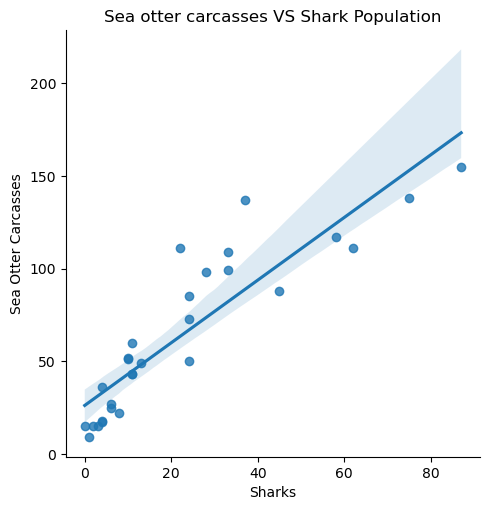

In [101]:
plot = sns.lmplot(shark_df_filtered, x="NumShark", y="NumCarcs")
plot.set(title = "Sea otter carcasses VS Shark Population", xlabel = "Sharks", ylabel = "Sea Otter Carcasses")

   ## Sea Otter Population Over Time
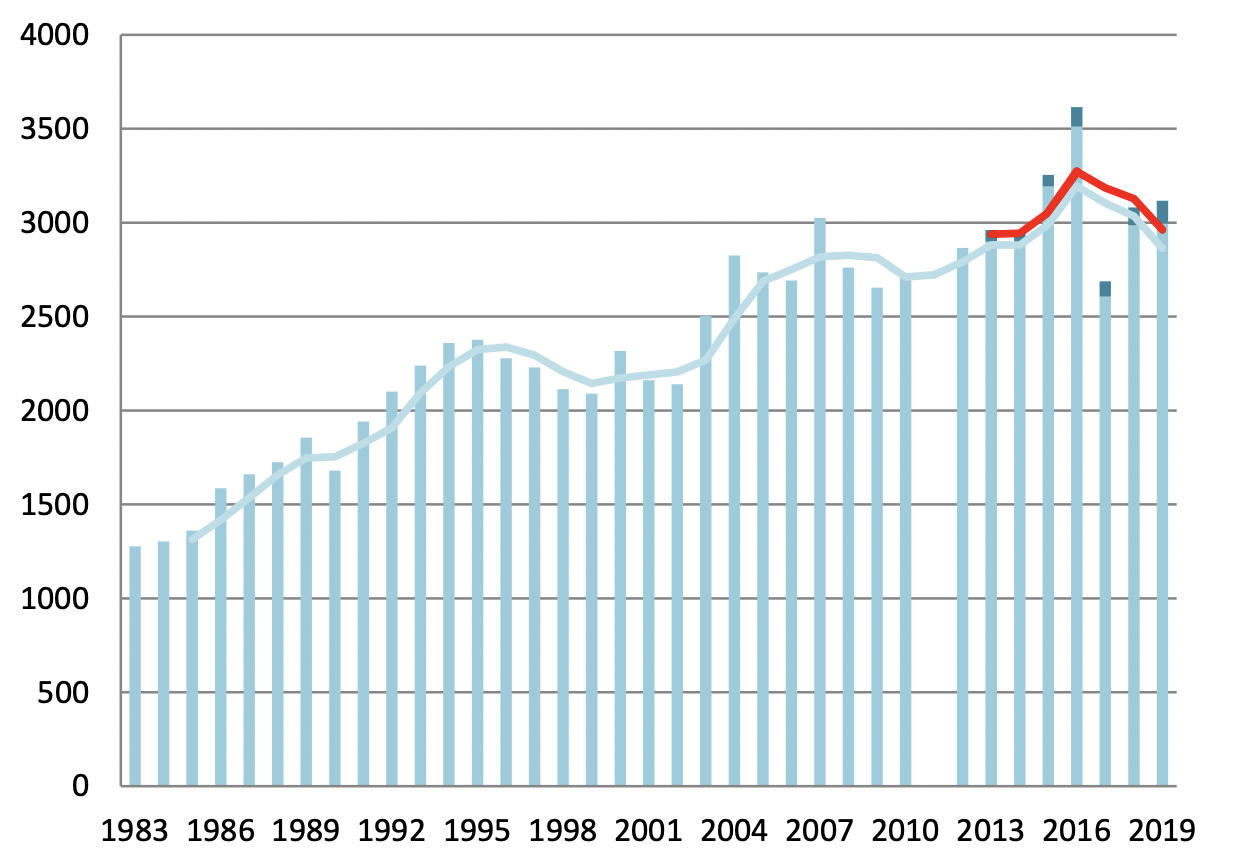

### Create csv file to store sea otter data (blocked, not by region)

In [102]:
# Load the CSV file
otterDf = pd.read_csv("AnnualCaliforniaSeaOtter_Census_summary_1985_2014.csv")

# Calculate total population for each year
otterDf["Total_Pop"] = otterDf["dens_sm"] * otterDf["HECTARES"] / 100
otterDf_grouped = otterDf.groupby("Year", as_index=False)["Total_Pop"].sum()

# Save to a new CSV file
otterDf_grouped.to_csv("condensed_otter_census.csv", index=False)

print("Condensed data saved to condensed_otter_census.csv")

Condensed data saved to condensed_otter_census.csv


# KELP STUFF

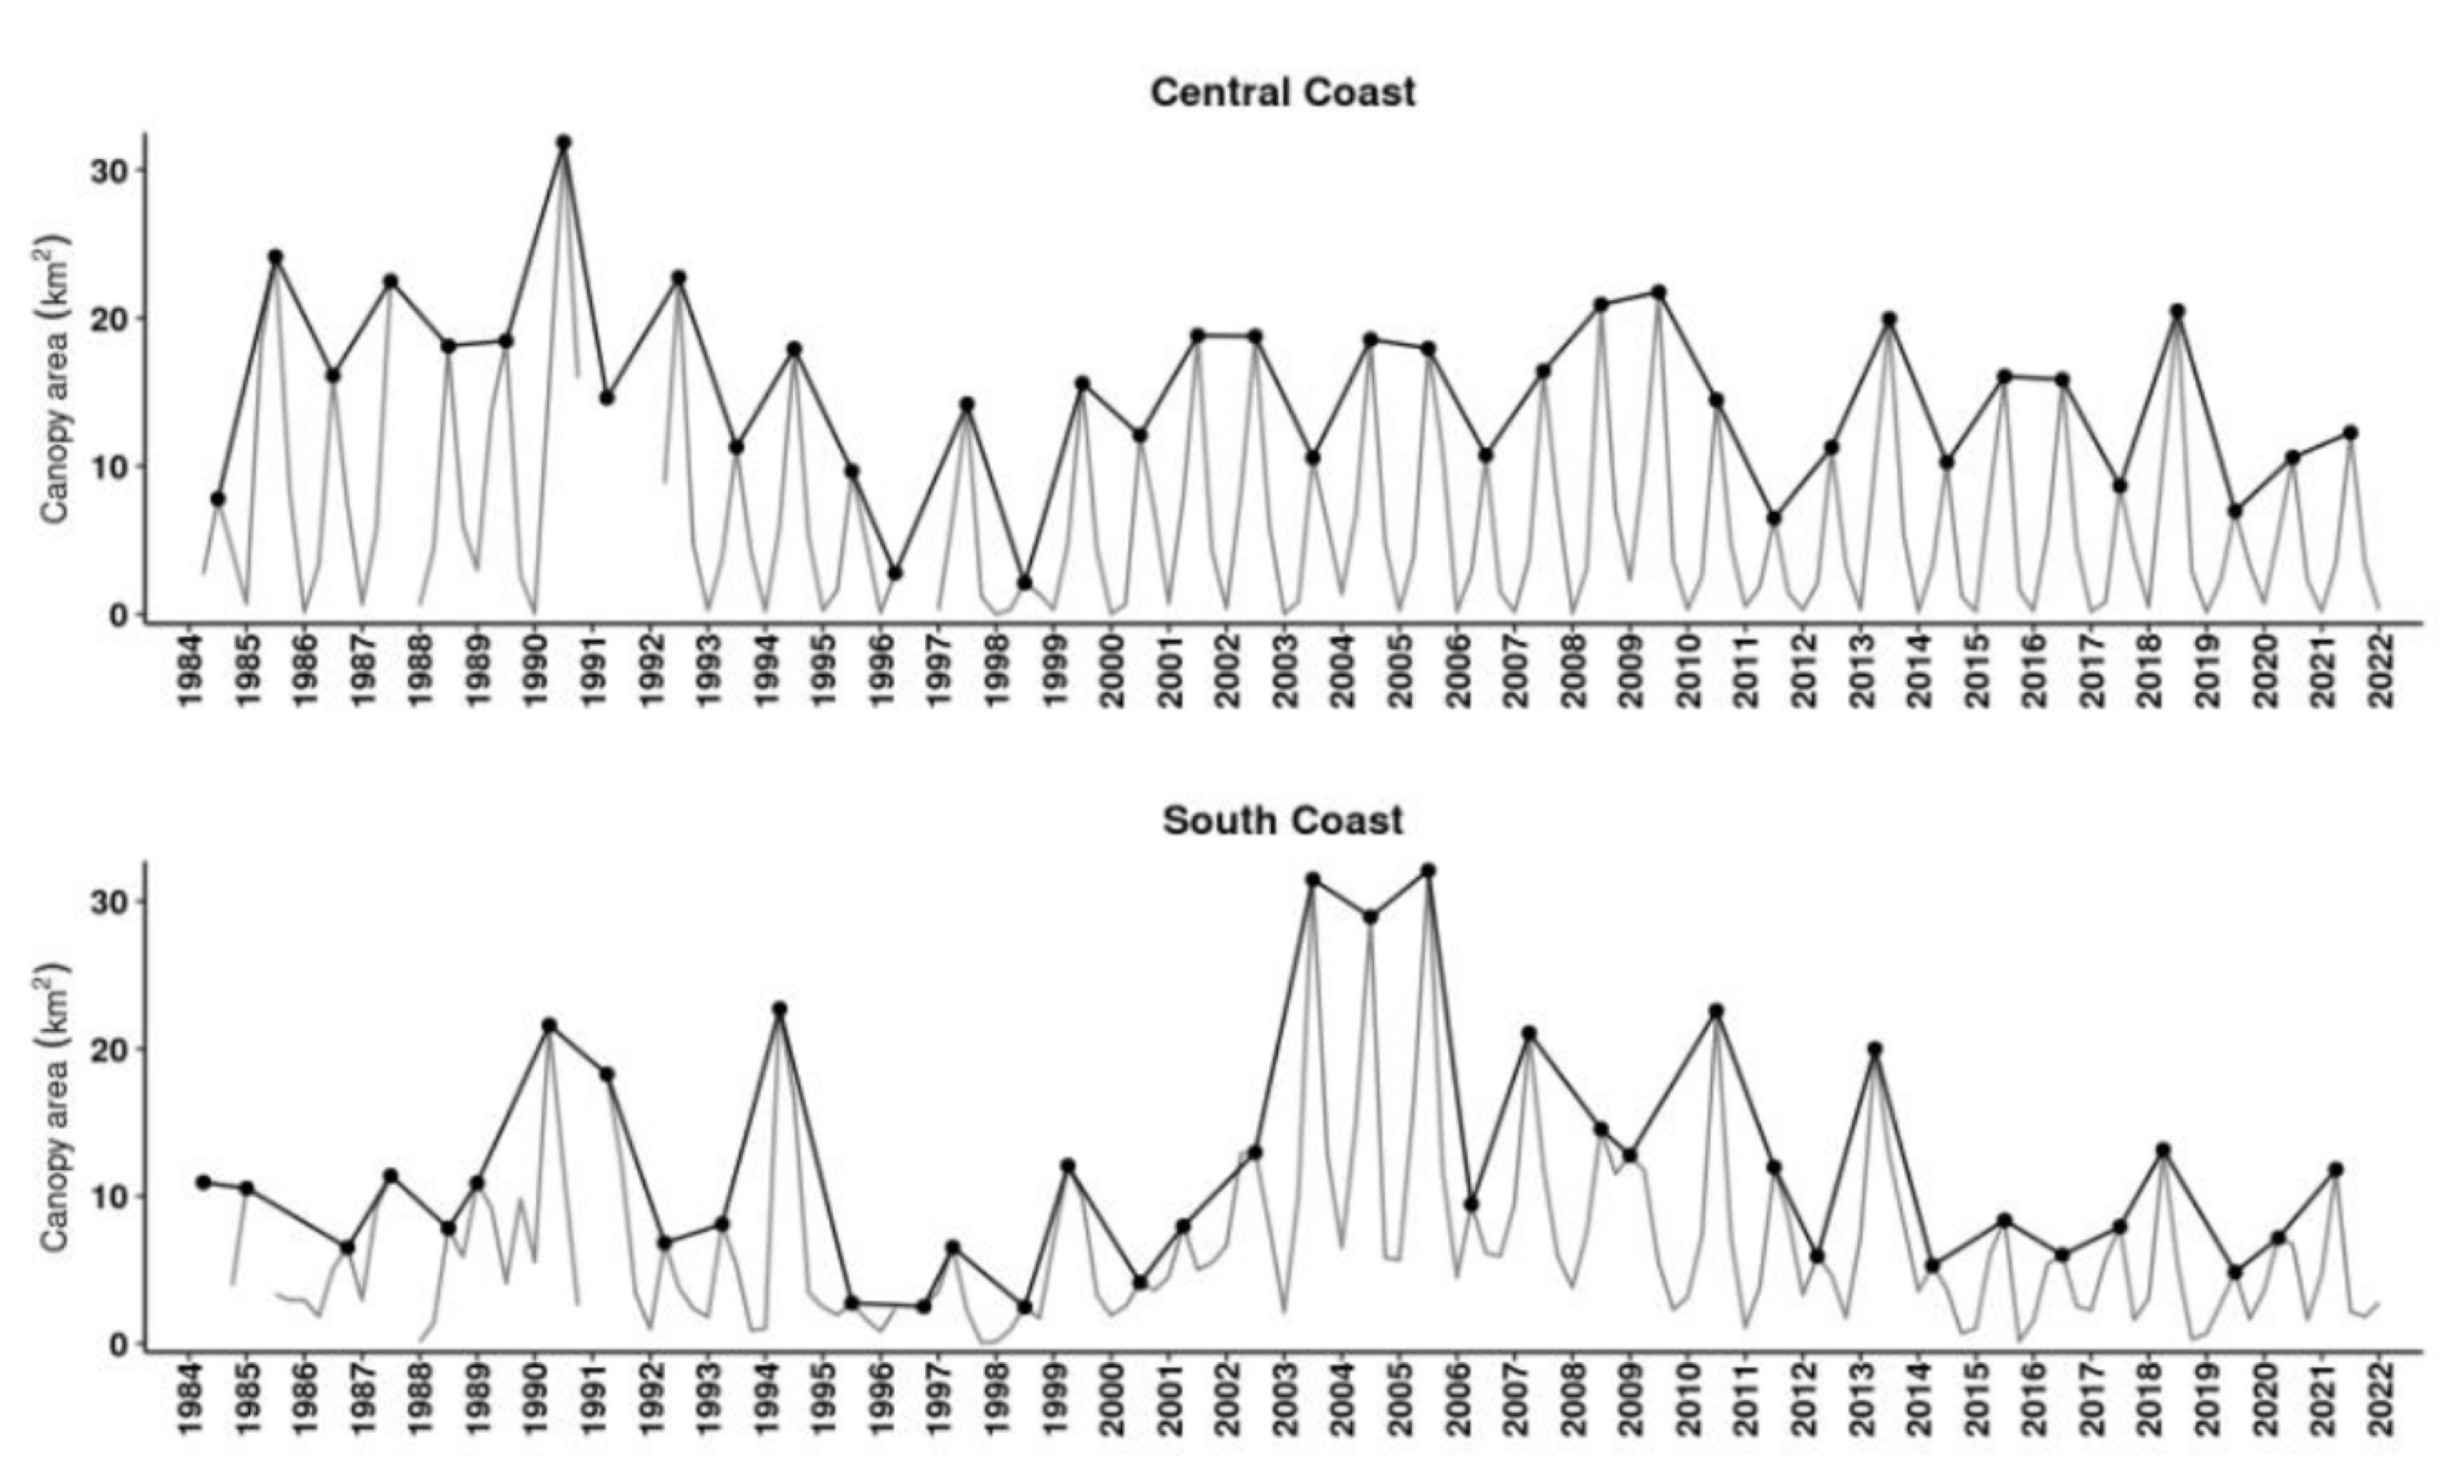

In [31]:
## GIant & Bull Kelp Cover Over Time
import matplotlib.image as mpimg

img = mpimg.imread("bull_giant_kelp_combined_census.png")  # Load the image
plt.figure(figsize=(12, 8), dpi=300)
plt.imshow(img)  # Display the image
plt.axis("off")  # Hide axis
plt.show()  # Show the image

# URCHIN STUFF

In [107]:
# Load the CSV file
kelp_df = pd.read_csv("kelp_swath_counts_CC.csv")

# Calculate the average urchin density for each year
kelp_df_grouped = kelp_df.groupby("year", as_index=False)["strongylocentrotus_purpuratus"].mean()

# Rename the column to "avg_urchins"
kelp_df_grouped.rename(columns={"strongylocentrotus_purpuratus": "avg_urchins"}, inplace=True)
kelp_df_grouped.rename(columns={"year": "Year"}, inplace=True)

# Save to a new CSV file
kelp_df_grouped.to_csv("condensed_urchin.csv", index=False)

print("Condensed data saved to condensed_urchin.csv")

Condensed data saved to condensed_urchin.csv


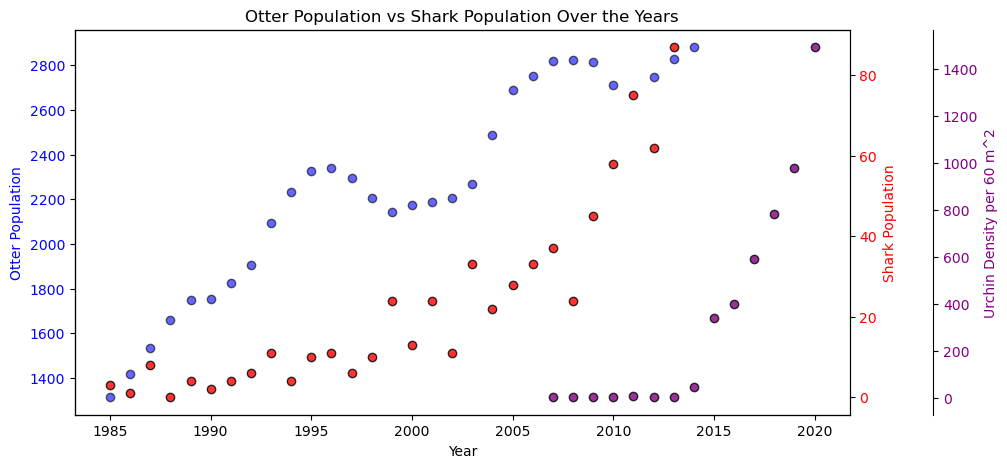

In [112]:
# Load the condensed CSV file
oc_df = pd.read_csv("condensed_otter_census.csv")

# Create the figure and first axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the condensed data on the primary y-axis
ax1.scatter(oc_df["Year"], oc_df["Total_Pop"], color="blue", alpha=0.6, edgecolors="black", label="Total Population")
ax1.set_xlabel("Year")
ax1.set_ylabel("Otter Population", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a second y-axis
ax2 = ax1.twinx()
ax2.scatter(shark_df_filtered["Year"], shark_df_filtered["NumShark"], color="red", alpha=0.8, edgecolors="black", label="Filtered Data")
ax2.set_ylabel("Shark Population", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Create a second y-axis
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))
ax3.scatter(kelp_df_grouped["Year"], kelp_df_grouped["avg_urchins"], color="purple", alpha=0.8, edgecolors="black", label="Filtered Data")
ax3.set_ylabel("Urchin Density per 60 m^2", color="purple")
ax3.tick_params(axis="y", labelcolor="purple")

# Create a scatter plot
#plt.figure(figsize=(10, 5))
#plt.scatter(oc_df["Year"], oc_df["Total_Pop"], color="blue", alpha=0.6, edgecolors="black")
#plt.scatter(df_filtered["Year"], df_filtered["NumShark"], color="red", alpha=0.8, edgecolors="black", label="Filtered Data")

# Labels and title
#plt.xlabel("Year")
#plt.ylabel("Total Otter Population")
#plt.title("Total Otter & Shark Population Over Time (1985-2014)")
#plt.grid(True)

# Title and grid
plt.title("Otter Population vs Shark Population Over the Years")

# Show the plot
plt.show()

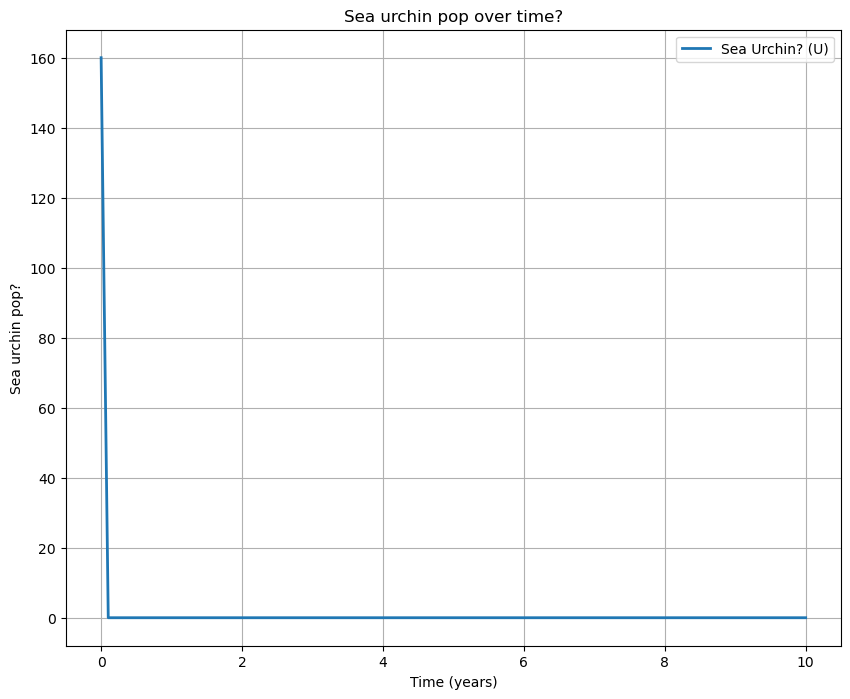

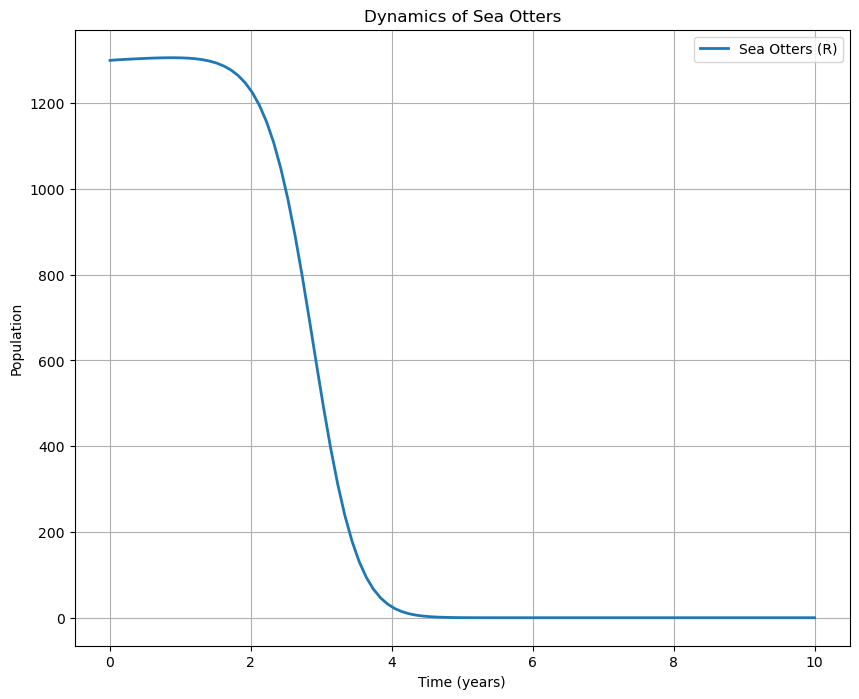

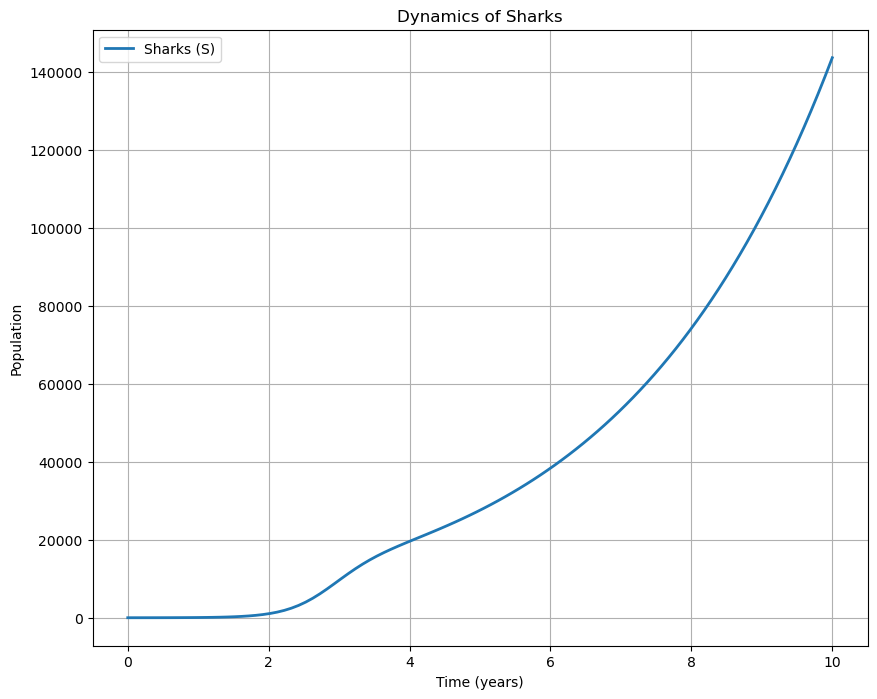

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define constant parameters (all set to 0.1)
a = 0.5   
f = 0.1   

b = 0.008
c = 0.0002
d = 0.0002

k = 0.33
e = 0.002
'''
a = 0.0117 
f = 0.1228

b = 0.1004
c = 0.0544
d = 0.2113

k = 0.0103
e = 0.1549
'''

# Define the system of ODEs based on your equations
def system(y, t, a, f, b, c, d, k, e):
    U, R, S = y  # U: sea urchins, R: sea otters, S: sharks. Sea urchins go from around 160 per meter squared, to around 450 per meter squared 
    dU_dt = a * U - f * U * R
    dR_dt = b * R + c * U * R - d * S * R
    dS_dt = k * S + e * S * R
    return [dU_dt, dR_dt, dS_dt]

# Initial conditions: [U, R, S]
y0 = [160, 1300, 3]

# time span:
t = np.linspace(0, 10, 100)

# Solve the system:
solution = odeint(system, y0, t, args=(a, f, b, c, d, k, e))

# Extract the solution for each species
U = solution[:, 0]
R = solution[:, 1]
S = solution[:, 2]

# Plot the results
plt.figure(figsize=(10, 8))
plt.plot(t, U, label='Sea Urchin? (U)', linewidth=2)
plt.xlabel('Time (years)')
plt.ylabel('Sea urchin pop?')
plt.title('Sea urchin pop over time?')
plt.legend()
plt.grid(True)
plt.show()

# Plot the results
plt.figure(figsize=(10, 8))
plt.plot(t, R, label='Sea Otters (R)', linewidth=2)
plt.xlabel('Time (years)')
plt.ylabel('Population')
plt.title('Dynamics of Sea Otters')
plt.legend()
plt.grid(True)
plt.show()

# Plot the results
plt.figure(figsize=(10, 8))
plt.plot(t, S, label='Sharks (S)', linewidth=2)
plt.xlabel('Time (years)')
plt.ylabel('Population')
plt.title('Dynamics of Sharks')
plt.legend()
plt.grid(True)
plt.show()